In [1]:
import numpy as np
import tensorflow as tf
import itertools
%matplotlib inline
import pylab
from IPython import display

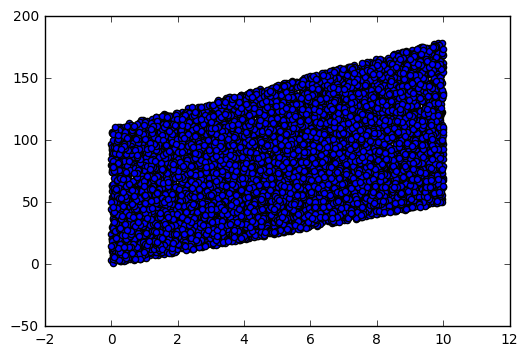

In [2]:
train_data = np.loadtxt(open("training_data.csv","rb"), delimiter=",")
x_data = train_data[:,0]
y_data = train_data[:,2]

# Plot our input data.
pylab.scatter(x_data, y_data)

In [3]:
W = tf.get_variable(shape=[], name='weights')

In [4]:
b = tf.get_variable(shape=[], name='bias')

In [5]:
# shape=[None] means we can put in any number of examples later. This is used for minibatch training, and to evaluate
# a lot of examples at once.
x = tf.placeholder(shape=[None], dtype=tf.float32, name='x')

In [6]:
# This is the same as tf.add(tf.mul(W, x), b), but looks nicer
y = x * W + b

In [7]:
# Write the graph so we can go look at it
sw = tf.train.SummaryWriter('.', graph=tf.get_default_graph())

In [9]:
init = tf.initialize_all_variables()
sess = tf.Session()

In [10]:
# This initialized the variables. You can re-run this to reset the model
sess.run(init)

In [11]:
# Test that we can compute a y from an x (without having trained anything). x must be a vector, hence [3] not just 3.
x_in = [3]
sess.run(y, feed_dict={x: x_in})

array([ 0.09100235], dtype=float32)

In [12]:
y_label = tf.placeholder(shape=[None], dtype=tf.float32, name='y_label')
diff = y - y_label
L = tf.reduce_mean(diff * diff)

In [13]:
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(L)

In [14]:
eval_data = np.loadtxt(open("eval_data.csv","rb"), delimiter=",")
def eval():
    return sess.run(L, feed_dict={x: eval_data[:,0], y_label: eval_data[:,2]})

In [15]:
# Evaluating without training gives us a baseline error.
eval()

8482.5518

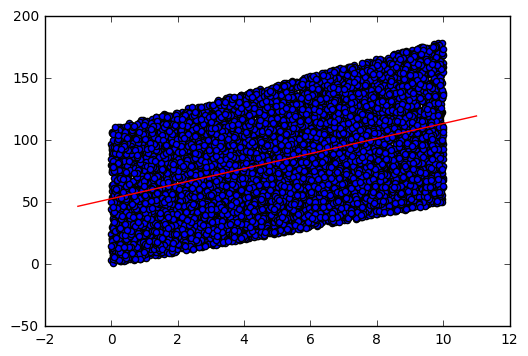

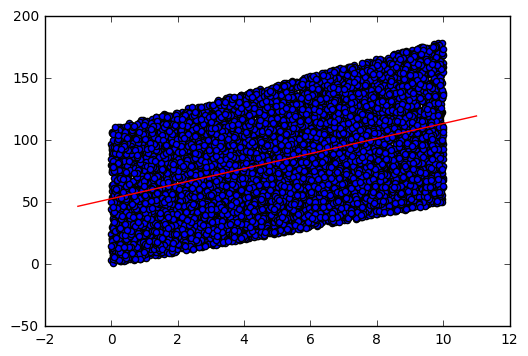

In [16]:
# Some drawing setup
pylab.scatter(eval_data[:, 0], eval_data[:, 2])

lines = None
def draw_line(x, y):
  # Remove the previously drawn line
  global lines
  if lines is not None:
      l = lines.pop(0)
      l.remove()
      del l
  lines = pylab.plot(x, y, color='r')
  # Redraw
  display.clear_output(wait=True)
  display.display(pylab.gcf())

# Split our training data into minibatches
def batch(iterable_with_len, n=1):
    l = len(iterable_with_len)
    for ndx in range(0, l, n):
        yield iterable_with_len[ndx:min(ndx + n, l)]
        
# Let's train! Play with these values (and the learning rate) if you dare.
batch_size = 1000
num_epochs = 100

for epoch in xrange(num_epochs):
    batches = itertools.izip(batch(x_data, batch_size), batch(y_data, batch_size))
    for x_in, y_in in batches:
        sess.run(train, feed_dict={x: x_in, y_label: y_in})
        y_line = sess.run(y, feed_dict={x: [-1, 11]})
    
    draw_line([-1,11], y_line)

In [17]:
eval()

1198.8066